## Import modules

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib import style
import pickle
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

## Read data from CSV
สามารถดูคำอธิบายในแต่ละ column ได้ใน student.txt

In [24]:
data = pd.read_csv("C:/Users/USER/Documents/JupyterLab/ML_basic_algorithms/linear_regression/dataset/student-mat.csv", sep=";")
# ข้อมูลถูกแยกด้วย ;
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Trim Data

In [25]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


## กำหนด column ที่ต้องการให้ทำนาย
ในโปรเจคเราต้องการให้ทำนาย final grade หรือ G3 นั้นเอง

- column G3 จะกลายเป็น label
- column ที่เหลือจะกลายเป็น features

หลังจากนั้นเราจะใช้ numpy สร้าง array ที่เก็บข้อมูล feature ทั้งหมด และ array ที่เก็บข้อมูลของ label

In [26]:
predict = "G3"

X = np.array(data.drop([predict], axis=1)) # Features
y = np.array(data[predict]) # Label

## สร้างตัวแปรสำหรับฝึกระบบ และทดสอบระบบ
จากนั้นเราจะแยกตัวแปลออกเป็น 2 ประเภทคือ

- ตัวแปรสำหรับฝึกระบบ
- ตัวแปรสำหรับทดสอบระบบ

และเราจะแยกข้อมูลออกมา 10% ไว้สำหรับการทดสอบระบบ

In [27]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

## เลือก algorithm มาใช้
ในโปรเจคนี้ feature แต่ละตัวสามารถนำมาสร้างความสัมพันธ์กับ label ได้ง่าย เช่น ขาดเรียนบ่อยจะได้เกรดต่ำ หรือมีระยะเวลาเรียนเยอะส่งผลให้ได้เกรดที่ดี เป็นต้น

เราเลยเลือก Linear regression มาใช้กับ model นี้

In [28]:
# กำหนด algorithm
linear = linear_model.LinearRegression()

In [29]:
# ฝึกระบบด้วยตัวแปรได้สร้างไว้
linear.fit(X_train, y_train)

LinearRegression()

In [30]:
# เช็คความแม่นยำของระบบที่เราฝึก
acc = linear.score(X_test, y_test) # Accuracy
print(acc)

0.7078552180525595


ความแม่นยำในแต่ละรอบการ run จะไม่เท่ากัน เพราะระบบจะสุ่มข้อมูลที่ฝึก และข้อมูลที่ใช้ทดสอบแต่ละรอบไม่เหมือนกัน

## Save model ด้วย pickle
ในโปรเจคนี้ data ไม่ได้เยอะมากแต่หากเป็นโปรเจคที่มีข้อมูลระดับ bigdata เราคงไม่มานั่งฝึกระบบใหม่ทุกรอบ

In [31]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

## เปิด model ที่ save ไว้ (model ที่ได้จากการ loop)

In [33]:
pickle_in = open("C:/Users/USER/Documents/JupyterLab/ML_basic_algorithms/linear_regression/studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

## Plot data

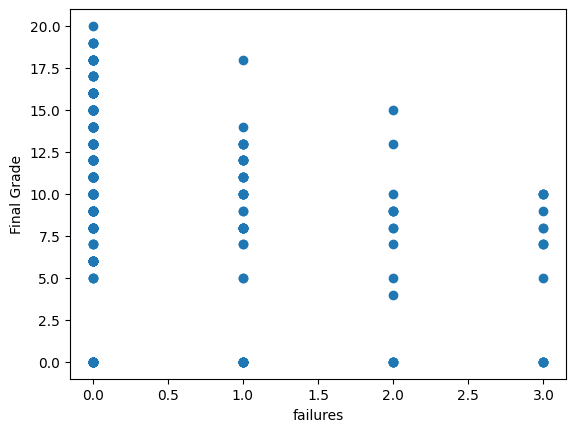

In [34]:
# Drawing and plotting model
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
pyplot.scatter(data[plot], data["G3"]) 
pyplot.xlabel(plot) # name x label
pyplot.ylabel("Final Grade") # name y label
pyplot.show()

## หากต้องการทดสอบระบบอย่างละเอียด
ด้วยการพิมพ์แสดงค่า feature ทุกอัน ค่า label ที่ได้จากการทำนาย และ label จริง ๆ ของข้อมูล

In [21]:
# เช็คค่า m และค่า c ที่ระบบสร้างขึ้นมา
print('Coefficient:', linear.coef_) # Slope value
print('Intercept:', linear.intercept_) # Intercept

Coefficient: [ 0.13282956  0.98965933 -0.2210996  -0.25685925  0.03572156]
Intercept: -1.2636807926546183


In [22]:
# เช็คระบบอย่างละเอียด
predictions = linear.predict(X_test) # list of all predictions

for x in range(len(predictions)):
        print(X_test[x], y_test[x], predictions[x]) # features, actural label, predicted label

[15 15  2  0  4] 15 15.274339678881336
[17 18  1  0  0] 18 18.58719015693551
[13 12  3  0  1] 12 11.711438273519503
[8 7 1 0 0] 6 6.505471434871886
[18 19  1  0 10] 19 20.066894662350677
[9 9 2 1 0] 0 8.139660812700892
[17 15  1  0  4] 16 15.761098400187134
[ 8 10  2  0  4] 9 9.396236081334589
[12 10  2  0  2] 11 9.8561112045837
[16 16  2  0  2] 16 16.325385451769083
[12 11  1  0 16] 11 11.566971991477708
[7 7 2 3 5] 7 5.5595723236678625
[ 9 10  2  0  2] 9 9.457622520580937
[10 13  2  1  6] 13 12.445457074864438
[ 9  7  2  1 20] 8 6.874773366297141
[ 9  9  2  0 56] 8 10.396927483312938
[10  9  3  0  2] 9 8.379693149636507
[15 15  2  0  2] 16 15.202896556793434
[7 9 2 0 0] 8 8.130860942183132
[10 10  2  0  2] 11 9.590452081915192
[10 10  2  1  0] 0 9.262149707676542
[6 5 1 1 0] 0 4.003634392769842
[10  9  2  0  4] 9 8.672235870361702
[12 12  2  0 13] 13 12.22836704334996
[10 11  4  0 10] 11 10.423684706633624
[15 12  3  0  0] 14 11.941375835144058
[13 13  2  0 14] 14 13.38657749936956
[